In [65]:
import pandas as pd

In [66]:
df = pd.read_csv('ai_assistant_usage_student_life.csv')

In [67]:
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [68]:
def column_value_count(columnname) :
    value_count = df[columnname].value_counts()
    return value_count 

In [69]:
column_value_count('StudentLevel')

StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64

In [70]:
df.shape


(10000, 11)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [72]:
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


In [73]:
column_value_count('TaskType')

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

In [74]:
column_value_count('UsedAgain')

UsedAgain
True     7064
False    2936
Name: count, dtype: int64

In [75]:
## performing EDA Using the pandas profiling 

In [76]:
from pandas_profiling import ProfileReport

In [77]:
profile = ProfileReport(df)
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 46.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [78]:
df = df.drop(columns=['SessionID','Discipline','SessionDate'])
## input columns - StudentLevel , SessionLengthMin , TotalPrompts , TaskType , AI_AssistanceLevel , FinalOutcome , SatisfactionRating 
## target columns - UsedAgain

In [79]:
df.head()

,StudentLevel,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,Undergraduate,31.20,11,Studying,2,Assignment Completed,True,1.0
1,Undergraduate,13.09,6,Studying,3,Assignment Completed,True,2.0
2,Undergraduate,19.22,5,Coding,3,Assignment Completed,True,3.3
3,Undergraduate,3.70,1,Coding,3,Assignment Completed,True,3.5
4,Undergraduate,28.12,9,Writing,3,Assignment Completed,True,2.9


# pipeline start

In [80]:
# train test split
from sklearn.model_selection import train_test_split

x = df.drop(columns=['UsedAgain'])
y = df['UsedAgain']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state=0)

In [81]:
x_train.head()

,StudentLevel,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,SatisfactionRating
7681,Undergraduate,6.10,1,Coding,2,Assignment Completed,1.4
9031,Graduate,9.85,4,Studying,4,Confused,4.5
3691,Graduate,12.84,5,Research,5,Assignment Completed,4.4
202,Undergraduate,23.58,6,Coding,4,Idea Drafted,3.9
5625,High School,30.68,10,Brainstorming,3,Idea Drafted,2.7


## pipeline starts

In [156]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import numpy as np

In [157]:
numeric_columns = ['SessionLengthMin','TotalPrompts','AI_AssistanceLevel','SatisfactionRating']
categorical_columns = ['StudentLevel','TaskType','FinalOutcome']

# checking need of transform or not

In [154]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

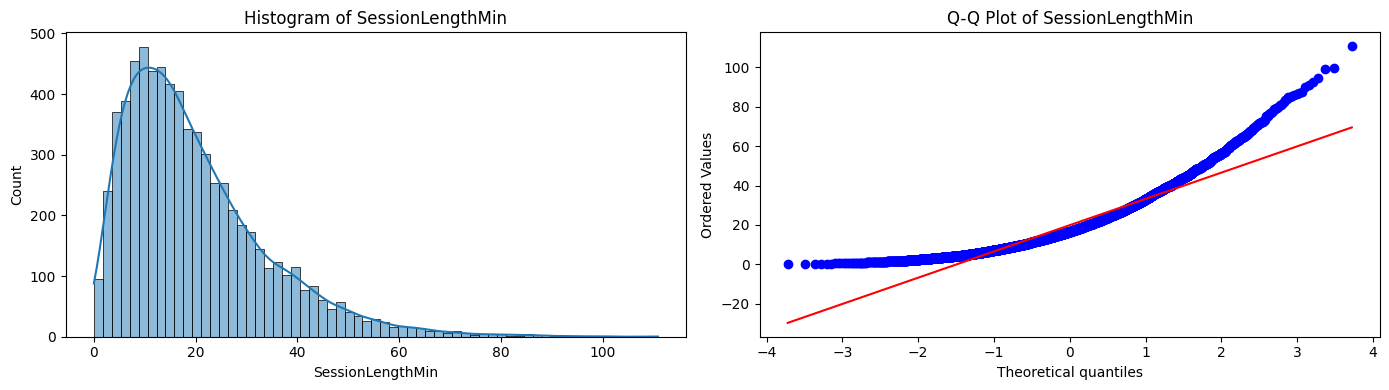

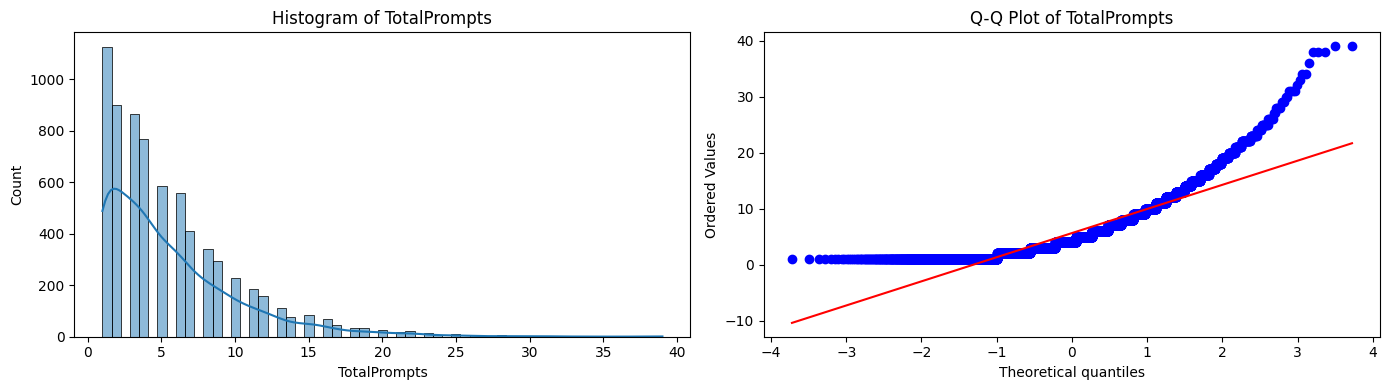

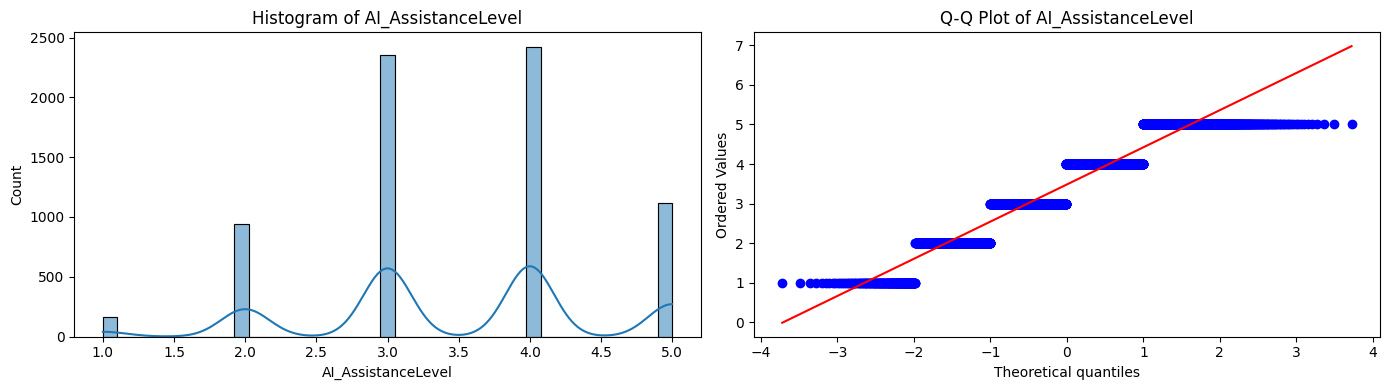

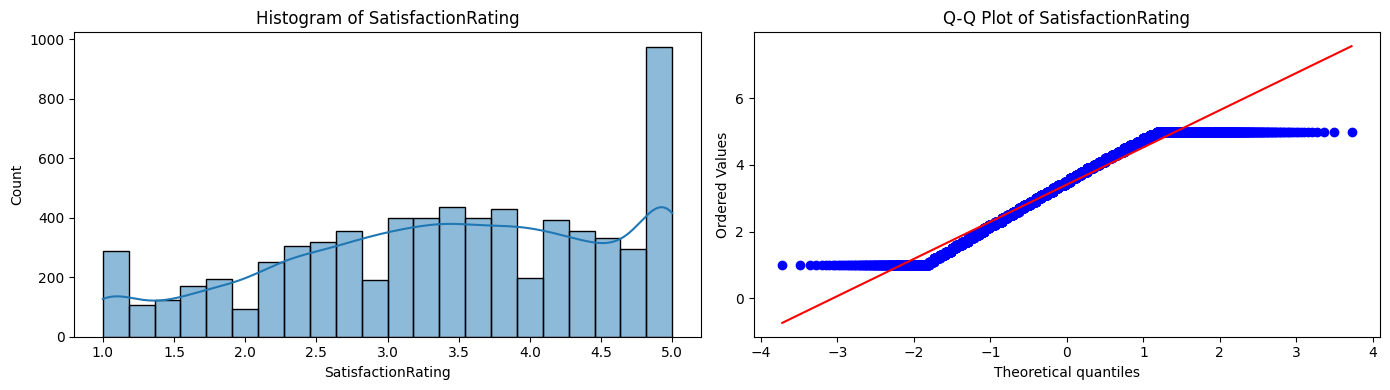

In [155]:
for col in numeric_columns:
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(x_train[col], kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

    plt.tight_layout()
    plt.show()


In [178]:
# Define your log transform function
def log_transform(x):
    return np.sqrt(x)


In [188]:
from sklearn.preprocessing import PowerTransformer
# Define transformers
trf1 = Pipeline([
    ('imputer', SimpleImputer()),                     # for numerical features
    ('power', PowerTransformer(method='yeo-johnson'))      # log transform
])


In [189]:
trf2 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # for categorical features
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # one-hot encode
])


In [190]:
# Combine all transformers into a single ColumnTransformer
trf = ColumnTransformer([
    ('num', trf1, numeric_columns),   # apply trf1 to numerical columns (index 0 to 3)
    ('cat', trf2, [4, 5, 6])       # apply trf2 to categorical columns (index 4 to 6)
])


In [191]:
# Final step model
trf4 = LinearRegression()

# Combine into a single pipeline
pipe = Pipeline([
    ('trf', trf),
    ('model', trf4)
])


In [192]:
# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Fit the pipeline
pipe.fit(x_train, y_train_encoded)

,steps,"[('trf', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [193]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [194]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict using the trained pipeline on the entire test set
y_pred = pipe.predict(x_test)

# Round predictions to nearest integer (for classification-style accuracy)
y_pred_rounded = np.round(y_pred).astype(int)

# Check prediction output
print("Sample predictions (rounded):", y_pred_rounded[:])
print("Unique classes predicted:", set(y_pred_rounded))

# Evaluate accuracy on the entire test set
accuracy = accuracy_score(y_test_encoded, y_pred_rounded)
print("Accuracy on all test cases:", accuracy)


Sample predictions (rounded): [1 1 1 ... 1 1 0]
Unique classes predicted: {0, 1}
Accuracy on all test cases: 0.7516666666666667
